<a href="https://colab.research.google.com/github/Edu-Moreira/Estudos-de-Python/blob/main/Compara%C3%A7%C3%A3o_ETFs%20v1.01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install investpy 

     |████████████████████████████████| 4.4 MB 4.3 MB/s 
     |████████████████████████████████| 235 kB 24.9 MB/s 
     |████████████████████████████████| 6.4 MB 37.8 MB/s 
     |████████████████████████████████| 503 kB 47.3 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=aac3da7c6d967c30026cad8845bff1568ddfbca7a031b5123e7ae2959d1ded26
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: pytz
    Found existing installation: pytz 2018.9
    Uninstalling pytz-2018.9:
      Successfully uninstalled pytz-2018.9
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import investpy as inv
import pandas as pd 
import seaborn as sns 
import time
import matplotlib.pyplot as plt 
import datetime as dt

In [3]:
hoje = dt.date.today()
hoje = hoje.strftime('%d/%m/%Y')
print(hoje)

pais = 'united states'

tipo_etf = 'bond'

14/04/2022


In [4]:
# obtendo a lista de todos os ETFs dos Estados Unidos no Investing.com

lista_etf = inv.get_etfs_dict(pais)


In [28]:
# Para buscar informações especificas de cada ETF 
'''
for i in range(len(lista_etf)):
    if (lista_etf[i]['isin']=='US46434V6130'):
        info = lista_etf[i]['name']
'''

#Obetndo lista com o nome de todos os ETFs
nome_etf = []

#Cria um filtro por tipo de etf
# for i in range(len(lista_etf)):
#   if (lista_etf[i]['asset_class']== tipo_etf):
#     nome_etf.append(lista_etf[i]['name'])  


#para fazer a busca sem filtro
for i in range(len(lista_etf)):
  nome_etf.append(lista_etf[i]['name'])


In [6]:
# nome_etf_filtro  = []
# filtro = [s for s in nome_etf if "High Yield" in s]

# for i in range(len(nome_etf)):
#   if(nome_etf[i] == any(filtro)):
#     nome_etf.drop(nome_etf[i])

In [29]:
lista_nomes = []

r = len(nome_etf)//10
for i in range(r+1):
  lista_nomes.append(nome_etf[(i*10):((i*10)+10)])



In [35]:
painel = pd.DataFrame()

 
for j in nome_etf:
  try:
    painel[j] = inv.get_etf_historical_data(etf = j,country = pais, from_date = '01/01/2015',to_date = hoje)['Close']
    time.sleep(0.5)
  except:
    pass

/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Xetra".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "mexico" and default stock_exchange: "Mexico".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "canada" and default stock_exchange: "Toronto".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Wa

In [17]:
inv.get_etf_historical_data(etf = nome_etf[2], country = pais, from_date = '01/01/2015', to_date = hoje)['Close']

ConnectionError: ignored

In [ ]:
etf0 =pd.DataFrame()
etf1 =pd.DataFrame()


for i  in nome_etf:
  try:
    etf1= inv.get_etf_historical_data(etf = nome_etf[2], country = pais, from_date = '01/01/2015', to_date = hoje)['Close']
    painel = pd.concat([etf0,etf1],axis =1)
    time.sleep(0.5)
  except:
    pass
      

In [32]:
painel = pd.DataFrame()

contador = 0 

for i in range(len(lista_nomes)):
  for j in lista_nomes[i]:
    try:
      painel[j] = inv.get_etf_historical_data(etf = j,country = pais, from_date = '01/01/2015',to_date = hoje)['Close']
      contador = contador + 1
      time.sleep(0.5)
    except:
      pass


/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "united kingdom" and default stock_exchange: "London".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "germany" and default stock_exchange: "Xetra".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "mexico" and default stock_exchange: "Mexico".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Warning: Selected country does not contain the default stock exchange of the introduced ETF. Default country is: "canada" and default stock_exchange: "Toronto".
  Warning,
/usr/local/lib/python3.7/dist-packages/investpy/etfs.py:745: Wa

In [10]:
# inv.get_etf_historical_data(etf = 'SPDR Barclays International Corporate Bond',country = pais, from_date = '01/01/2015',to_date = hoje)


,Open,High,Low,Close,Volume,Currency,Exchange
Date,,,,,,,
2015-01-02,34.36,34.36,34.20,34.23,24036,USD,NYSE
2015-01-05,34.65,34.65,33.86,34.06,77244,USD,NYSE
2015-01-06,34.19,34.19,33.88,34.01,67157,USD,NYSE
2015-01-07,33.95,33.95,33.64,33.71,62683,USD,NYSE
2015-01-08,33.63,33.64,33.52,33.52,123330,USD,NYSE
...,...,...,...,...,...,...,...
2022-04-07,31.24,31.25,31.12,31.14,19570,USD,NYSE
2022-04-08,31.00,31.09,30.93,31.08,6167,USD,NYSE
2022-04-11,30.93,30.94,30.83,30.83,32159,USD,NYSE


In [11]:
retorno_painel = painel.pct_change()

In [36]:

painel

""


In [13]:
# import sys

# retorno_painel.to_csv(sys.stdout, sep = ',')

In [14]:
# lista_nomes[1][1]

'iShares $ Short Duration Corp Bond Acc'

In [15]:
import io
import requests

url= 'https://github.com/Edu-Moreira/Estudos-de-Python/raw/main/Dados/Dados%20IE.xlsx'
myfile = requests.get(url)

df=pd.read_excel(myfile.content)
print(df)

           Data  USD LC07TRUU   USD SPTR   USD M1CXBRU   USD MIMUEMRN   \
0    1998-12-31       212.0865   1670.006        477.68      267.04001   
1    1999-01-04       212.0641   1668.521        486.52      270.20279   
2    1999-01-05       211.8054   1691.253        489.26      272.39230   
3    1999-01-06       212.1331   1729.083        496.11      278.48300   
4    1999-01-07       211.7084   1725.640        494.54      279.80511   
...         ...            ...        ...           ...            ...   
5790 2022-01-18       616.7014   9595.926       1588.46     1758.11600   
5791 2022-01-19       618.1821   9503.135       1580.24     1755.67800   
5792 2022-01-20       618.8629   9398.964       1590.57     1776.91891   
5793 2022-01-21       620.5297   9221.282       1564.14     1759.46330   
5794 2022-01-24       619.7807   9246.837       1521.55     1727.05400   

      USD LG38TRUU  USD SPTRSMCP   
0         244.2719        186.094  
1         244.2719        186.094  
2  

In [16]:
df.rename(columns= {'Data': 'Date'}, inplace = True)
df_benchmark  = df[['Date','USD LG38TRUU']]
df_benchmark

,Date,USD LG38TRUU
0,1998-12-31,244.2719
1,1999-01-04,244.2719
2,1999-01-05,244.2719
3,1999-01-06,244.2719
4,1999-01-07,244.2719
...,...,...
5790,2022-01-18,491.6966
5791,2022-01-19,491.8776
5792,2022-01-20,493.2359
5793,2022-01-21,493.8587


In [16]:
tot_df = pd.merge(df_benchmark,painel, on = 'Date')
tot_df

NameError: ignored

In [23]:
corr_etfs = tot_df.corr()
gla_etfs = corr_etfs['USD LG38TRUU']

etfs_eleitos = gla_etfs.loc[gla_etfs > 0.95]

a = list(etfs_eleitos.index)
a.append('Date')
b = tot_df[a]
b = b.set_index('Date')

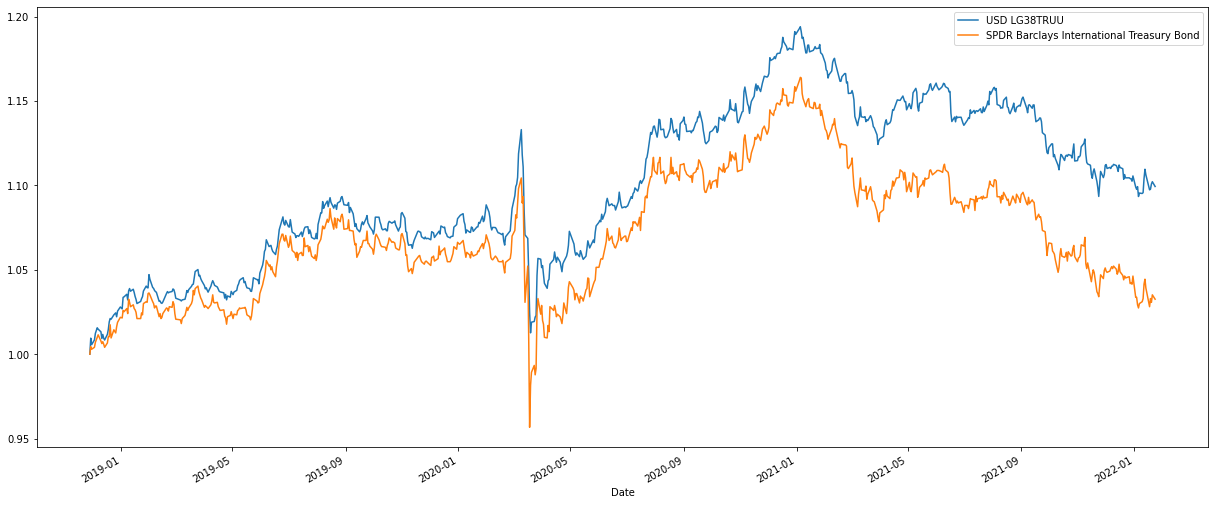

In [24]:
b = b.loc['20181128':]
c = b /b.loc['20181128']
c.plot(figsize = (21,9))

## <font color = '009dcf'> Cáculo de Tracking Error
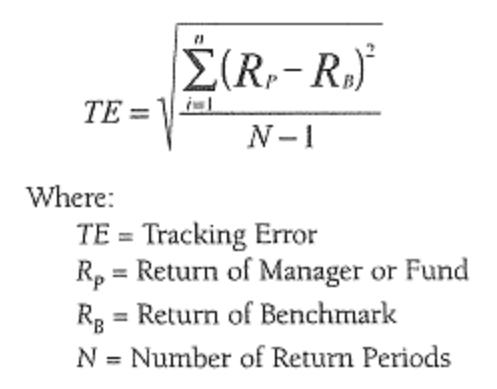

In [20]:
d = b.pct_change()
d = d[1:]
d



,USD LG38TRUU,Columbia Diversified Fixed Income Allocation,Guggenheim BulletShares 2025 Corporate Bond,Guggenheim BulletShares 2027 Corporate Bond,SPDR Barclays International Treasury Bond,SPDR Barclays International Corporate Bond,USAA Core Short-Term Bond
Date,,,,,,,
2018-11-29,0.009496,0.000529,NaN,-0.000535,0.004441,0.001538,-0.000607
2018-11-30,-0.003792,-0.001586,NaN,-0.004283,-0.001474,-0.002763,-0.000810
2018-12-03,0.002774,0.002647,0.003083,0.005914,0.001107,-0.002771,0.000608
2018-12-04,0.003857,0.002640,-0.000512,0.000534,0.002949,0.006792,-0.000203
2018-12-06,0.003249,0.000000,0.002563,0.001603,0.002940,-0.001533,0.001013
...,...,...,...,...,...,...,...
2022-01-18,-0.008036,-0.007187,-0.003683,-0.005650,-0.010684,-0.012507,-0.001954
2022-01-19,0.000368,-0.001448,0.000924,0.000947,0.004680,0.005007,0.000392
2022-01-20,0.002761,0.002900,-0.000923,-0.000473,-0.002150,-0.002345,-0.000196


In [22]:
import numpy as np

TE = ((d['USD LG38TRUU'] - d['SPDR Barclays International Treasury Bond'])**2)
TE = np.sqrt(sum(TE))
TE

0.09679708499683083